In [44]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import multivariate_normal

### 1. Generate Data

In [45]:
random.seed(50120057)

#### 1-1. Create data X between (-2,2)
#### 1-2. Create N*D size Matrix

In [46]:
N = 4000
D = 2
x =  np.linspace(start = -2, stop = 2, num = N)
X = np.transpose(np.array([np.repeat(1,N),x]))

#### 1-3. Set true value of $\beta$

In [47]:
tr_beta = [-1,2.5]

#### 1-4. Define Sigmoid function & Determine y

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [49]:
p_mat = sigmoid(np.dot(X,tr_beta))

In [50]:
y = np.zeros(N)
y = np.random.binomial(1, p_mat, N)

### 2. M-H Algorithm Step

#### 2-1. Set initial value

In [51]:
T = 3000
beta_mat = np.zeros((T,D))

In [52]:
cov_mat = np.linalg.inv(np.dot(np.transpose(X),X))

In [53]:
def log_like(beta,N,X,y):
    log_like = 0
    for i in range(0,N):
        xi_beta = np.dot(X[i,:],beta)
        log_like = log_like + (1-y[i])*(-xi_beta)-math.log(1+np.exp(-xi_beta))
    return log_like

In [54]:
for i in range(0,T-1):
    beta_star = np.random.multivariate_normal(beta_mat[i,:],cov_mat)
    
    new_like = log_like(beta_star,N,X,y)
    old_like = log_like(beta_mat[i,:],N,X,y)
    
    alpha = np.exp(new_like - old_like)
    
    p = min(alpha,1)
    
    if np.random.uniform(1,0,1) <= p:
        beta_mat[i+1,:] = beta_star
    else:
        beta_mat[i+1,:] = beta_mat[i,:] 

#### 3. Check the Result

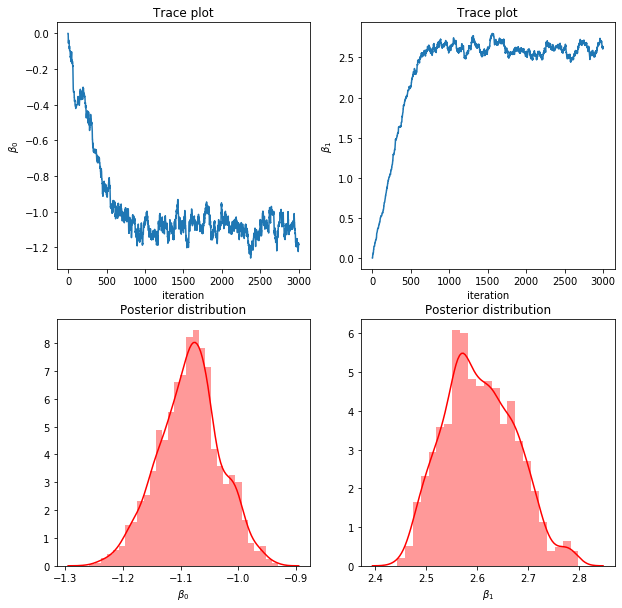

In [55]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(beta_mat[:,0])
plt.xlabel("iteration")
plt.ylabel(r'$\beta_{0}$')
plt.title("Trace plot")

plt.subplot(2,2,2)
plt.plot(beta_mat[:,1])
plt.xlabel("iteration")
plt.ylabel(r'$\beta_{1}$')
plt.title("Trace plot")

plt.subplot(2,2,3)
sns.distplot(beta_mat[1000:,0], color="red")
plt.xlabel(r"$\beta_{0}$")
plt.title("Posterior distribution")

plt.subplot(2,2,4)
sns.distplot(beta_mat[1000:,1], color="red")
plt.xlabel(r"$\beta_{1}$")
plt.title("Posterior distribution")

plt.show()